# Introdução

Neste projeto de classificação da potabilidade da água, foi adotada a **metodologia CRISP-DM (Cross Industry Standard Process for Data Mining)** devido à sua estrutura bem definida, iterativa e amplamente reconhecida na indústria de ciência de dados.

O CRISP-DM orientou todas as etapas do projeto conforme as seguintes informações:

* 1) **Entendimento do Negócio:** Definiu-se o objetivo de prever a potabilidade da água com base em parâmetros físico-químicos.
* 2) **Entendimento dos Dados:** Realizou-se uma análise exploratória para compreender a estrutura, qualidade e desbalanceamento dos dados.
* 3) **Preparação dos Dados:** Incluiu tratamento de valores ausentes, aplicação de SMOTE e divisão em treino e teste.
* 4) **Modelagem:** Modelos como Random Forest e XGBoost foram otimizados com Optuna.
* 5) **Avaliação:** O desempenho dos modelos foi comparado com base em métricas como accuracy, recall e f1-score.
* 6) **Implantação:** O melhor modelo foi registrado no MLflow Registry, pronto para uso em produção.

A escolha pelo CRISP-DM garantiu organização, reprodutibilidade e alinhamento entre objetivos técnicos e de negócio, tornando-o ideal para projetos de ciência de dados estruturados como este.

# Parte 1) Entendimento do negócio (problema): Previsão da Potabilidade da Água

### Objetivo do Projeto

Desenvolver um modelo de **classificação supervisionada** capaz de prever se uma amostra de água é **potável (1)** ou **não potável (0)** com base em variáveis físico-químicas.  
A solução visa apoiar políticas públicas de saneamento, saúde e monitoramento ambiental, contribuindo diretamente para o acesso à água segura, conforme recomendado pela Organização Mundial da Saúde (OMS).

---

### Contexto

O acesso à água potável é um **direito humano fundamental** e componente crucial de políticas de saúde pública.  
A qualidade da água impacta diretamente a saúde da população, os custos hospitalares e a produtividade econômica.  
Em várias regiões, melhorias no sistema de abastecimento e monitoramento de qualidade resultam em benefícios econômicos líquidos ao reduzir doenças de veiculação hídrica.

Com base em um conjunto de **3.276 observações** provenientes de diferentes fontes de água, este projeto busca prever a **potabilidade da água** a partir de 9 variáveis mensuráveis que refletem aspectos químicos, físicos e microbiológicos da água.

---

### Descrição das Variáveis

| Variável           | Descrição                                                                 | Faixa Recomendada / Limite     |
|--------------------|---------------------------------------------------------------------------|---------------------------------|
| `ph`               | Avalia o equilíbrio ácido-base da água. Ideal entre 6.5 e 8.5.            | 6.5 – 8.5 (OMS)                 |
| `Hardness`         | Concentração de sais de cálcio e magnésio (dureza).                       | —                               |
| `Solids`           | Total de sólidos dissolvidos (TDS). Indica grau de mineralização.        | < 500 mg/L (ideal), máx. 1000   |
| `Chloramines`      | Agente desinfetante comumente usado em água potável.                     | ≤ 4 mg/L                        |
| `Sulfate`          | Substância natural presente em vários ambientes.                         | 3 a 30 mg/L (normal), até 1000  |
| `Conductivity`     | Relaciona-se com a quantidade de íons dissolvidos.                       | ≤ 400 μS/cm                     |
| `Organic_carbon`   | Representa matéria orgânica natural ou sintética presente na água.       | < 4 mg/L                        |
| `Trihalomethanes`  | Subprodutos do tratamento com cloro.                                     | ≤ 80 ppm                        |
| `Turbidity`        | Opacidade causada por partículas em suspensão.                           | ≤ 5 NTU                         |
| `Potability`       | **Variável alvo**. Indica se a água é potável (1) ou não potável (0).    | —                               |

---

### Natureza do Problema

- **Tipo:** Classificação Binária (`0 = Não potável`, `1 = Potável`)
- **Variável-alvo:** `Potability`
- **Variáveis preditoras:** 9 variáveis contínuas relacionadas à qualidade da água
- **Desafio potencial:** Desbalanceamento de classes

---

### Aplicações Práticas

- Automação de estações de tratamento de água.
- Monitoramento em tempo real via sensores.
- Sistemas de alerta para gestores públicos e prefeituras.
- Apoio à tomada de decisão em contextos de crise hídrica ou desastres ambientais.

---

# Parte 2) Entendimento dos Dados

### 2.1) Fonte de Dados

O conjunto de dados utilizado neste projeto está disponível no arquivo `water_potability.csv`, com tamanho aproximado de 525 KB, contendo **3.276 registros** e **10 colunas**, cada uma representando uma variável físico-química ou o rótulo de potabilidade da água.

Este dataset simula amostras de diferentes fontes de água e visa representar cenários variados de qualidade da água, com base em parâmetros definidos por órgãos reguladores como a **OMS (Organização Mundial da Saúde)** e a **EPA (Agência de Proteção Ambiental dos EUA)**.

---

### Descrição das Colunas

| #  | Coluna             | Unidade     | Descrição                                                                                   |
|----|--------------------|-------------|---------------------------------------------------------------------------------------------|
| 1  | `ph`               | —           | Medida da acidez ou alcalinidade da água (escala de 0 a 14).                                |
| 2  | `Hardness`         | mg/L        | Capacidade da água de precipitar sabão, relacionada à presença de cálcio e magnésio.        |
| 3  | `Solids`           | ppm         | Sólidos dissolvidos totais. Alta concentração impacta sabor e cor da água.                  |
| 4  | `Chloramines`      | ppm         | Concentração de cloraminas, desinfetantes comuns em sistemas públicos de água.              |
| 5  | `Sulfate`          | mg/L        | Quantidade de sulfato dissolvido, presente naturalmente em solos e rochas.                  |
| 6  | `Conductivity`     | µS/cm       | Condutividade elétrica da água, relacionada à quantidade de íons dissolvidos.               |
| 7  | `Organic_carbon`   | ppm         | Quantidade de carbono orgânico, proveniente de matéria orgânica natural ou sintética.       |
| 8  | `Trihalomethanes`  | µg/L        | Subprodutos da cloração da água, potencialmente tóxicos em alta concentração.               |
| 9  | `Turbidity`        | NTU         | Grau de opacidade da água causado por partículas suspensas.                                 |
| 10 | `Potability`       | Binário     | **Variável alvo**. Indica se a água é potável (`1`) ou não potável (`0`).                   |

---

### Observações sobre a Coleta

- O conjunto de dados não inclui identificadores geográficos ou temporais, o que indica que a coleta foi **anonimizada ou simulada** para fins acadêmicos ou de benchmark.
- A unidade das variáveis foi padronizada em conformidade com os padrões técnicos:
  - **ppm** (partes por milhão)
  - **mg/L** (miligrama por litro)
  - **µg/L** (micrograma por litro)
  - **µS/cm** (microsiemens por centímetro)
  - **NTU** (Unidade Nefelométrica de Turbidez)
- Os valores ausentes (`NaN`) estão presentes em algumas variáveis e serão tratados durante o pré-processamento.
- A variável alvo (`Potability`) é **binária**, onde:
  - `1` → água potável
  - `0` → água não potável

---

### Potenciais Desafios Identificados

- **Valores ausentes**: Algumas variáveis contêm dados faltantes, o que exige imputação.
- **Desbalanceamento de classes**: A distribuição entre potável e não potável pode ser desigual, impactando a performance do modelo.

---



# Parte 2.2) Análise Exploratória de Dados (EDA)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import randint, uniform

import optuna
from sklearn.model_selection import train_test_split

import os
import missingno as msno
from imblearn.over_sampling import SMOTE

import warnings



In [36]:
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
# 🎨 Estilo dos gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

In [16]:
# Caminho do diretório atual onde está rodando o notebook
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Caminho para o arquivo CSV
data_path = os.path.join(base_dir, 'data', 'water_potability.csv')

# Verifica o caminho
print("CSV encontrado?", os.path.exists(data_path))

# Leitura do CSV
df = pd.read_csv(data_path)

CSV encontrado? True


In [17]:
#  Visão geral do dataset
print("🔍 Dimensões do dataset:", df.shape)
print("\n📋 Amostra dos dados:")
display(df.head())

🔍 Dimensões do dataset: (3276, 10)

📋 Amostra dos dados:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 2.2.1) Visão geral do dataset

- O dataset possui **3.276 linhas** e **10 colunas**.
- Cada linha representa uma **amostra de água** com medições físico-químicas e a respectiva indicação de **potabilidade** (`0` ou `1`).

---

### Primeiras Observações

- **Valores ausentes**: Já é possível observar `NaN` em algumas colunas como `ph` e `Sulfate`, indicando a necessidade de tratamento de valores ausentes no pré-processamento.
- **Escala dos dados**: Algumas variáveis possuem **valores em ordens de grandeza distintas**:
  - `Solids`, `Conductivity`, `Sulfate` → valores muito altos
  - `Turbidity`, `ph`, `Organic_carbon` → valores mais baixos
  - Isso **reforça a importância da padronização/normalização** antes da modelagem.
- **Variável alvo (`Potability`)**: Todas as 5 amostras exibidas possuem valor `0`, indicando que a amostra pode estar **desbalanceada** — o que será investigado na análise de distribuição da variável alvo.

### Conclusão parcial da subetapa do EDA

A etapa de visão geral mostra que os dados estão **bem estruturados**, mas com **alguns desafios típicos de dados reais**, como valores ausentes, escalas heterogêneas e potencial desbalanceamento. Esses pontos serão tratados nas próximas etapas do pipeline de modelagem preditiva.



In [18]:
# Verificando tipos e valores ausentes
print("\n📊 Tipos de dados e valores nulos:")
print(df.info())
print("\n🔢 Valores ausentes por coluna:")
print(df.isnull().sum())


📊 Tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

🔢 Valores ausentes por coluna:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability

## 2.2.2) Verificando tipos e valores ausentes

### Estrutura dos Dados

- O dataset possui **3.276 linhas** e **10 colunas**.
- Todas as variáveis preditoras são do tipo `float64`.
- A variável alvo (`Potability`) é do tipo `int64`, com valores binários (0 ou 1).

---

### Análise de Valores Ausentes

| Coluna            | Valores ausentes | Porcentagem (%)       |
|-------------------|------------------|------------------------|
| `ph`              | 491              | 14,99% (~15%)          |
| `Sulfate`         | 781              | 23,85% (alta)          |
| `Trihalomethanes` | 162              | 4,94% (relativamente baixa) |
| Outras colunas    | 0                | —                      |

### Observações:

- **Três colunas** possuem valores ausentes: `ph`, `Sulfate` e `Trihalomethanes`.
- A ausência de dados é **concentrada em atributos físico-químicos**, possivelmente por falhas em sensores ou medições não realizadas.
- Colunas como `Hardness`, `Solids`, `Chloramines`, `Conductivity`, `Organic_carbon`, `Turbidity` e `Potability` estão completas.

---

### Implicações para o Pré-processamento

| Coluna            | Estratégia sugerida de imputação                      |
|-------------------|-------------------------------------------------------|
| `ph`              | Imputar com **mediana**                               |
| `Sulfate`         | Imputar com **mediana**                               |
| `Trihalomethanes` | Imputar com **mediana**                               |

> 💡 Como os dados são contínuos e a proporção de valores ausentes não ultrapassa 25%, **a adição é preferível à remoção de linhas**.

---

### Insights da subetapa do EDA

A análise dos valores nulos mostra que o dataset é **majoritariamente completo**, mas exige atenção especial em três colunas com dados ausentes. Esse problema será resolvido na etapa de **pré-processamento dos dados**, garantindo a consistência do dataset antes da modelagem.



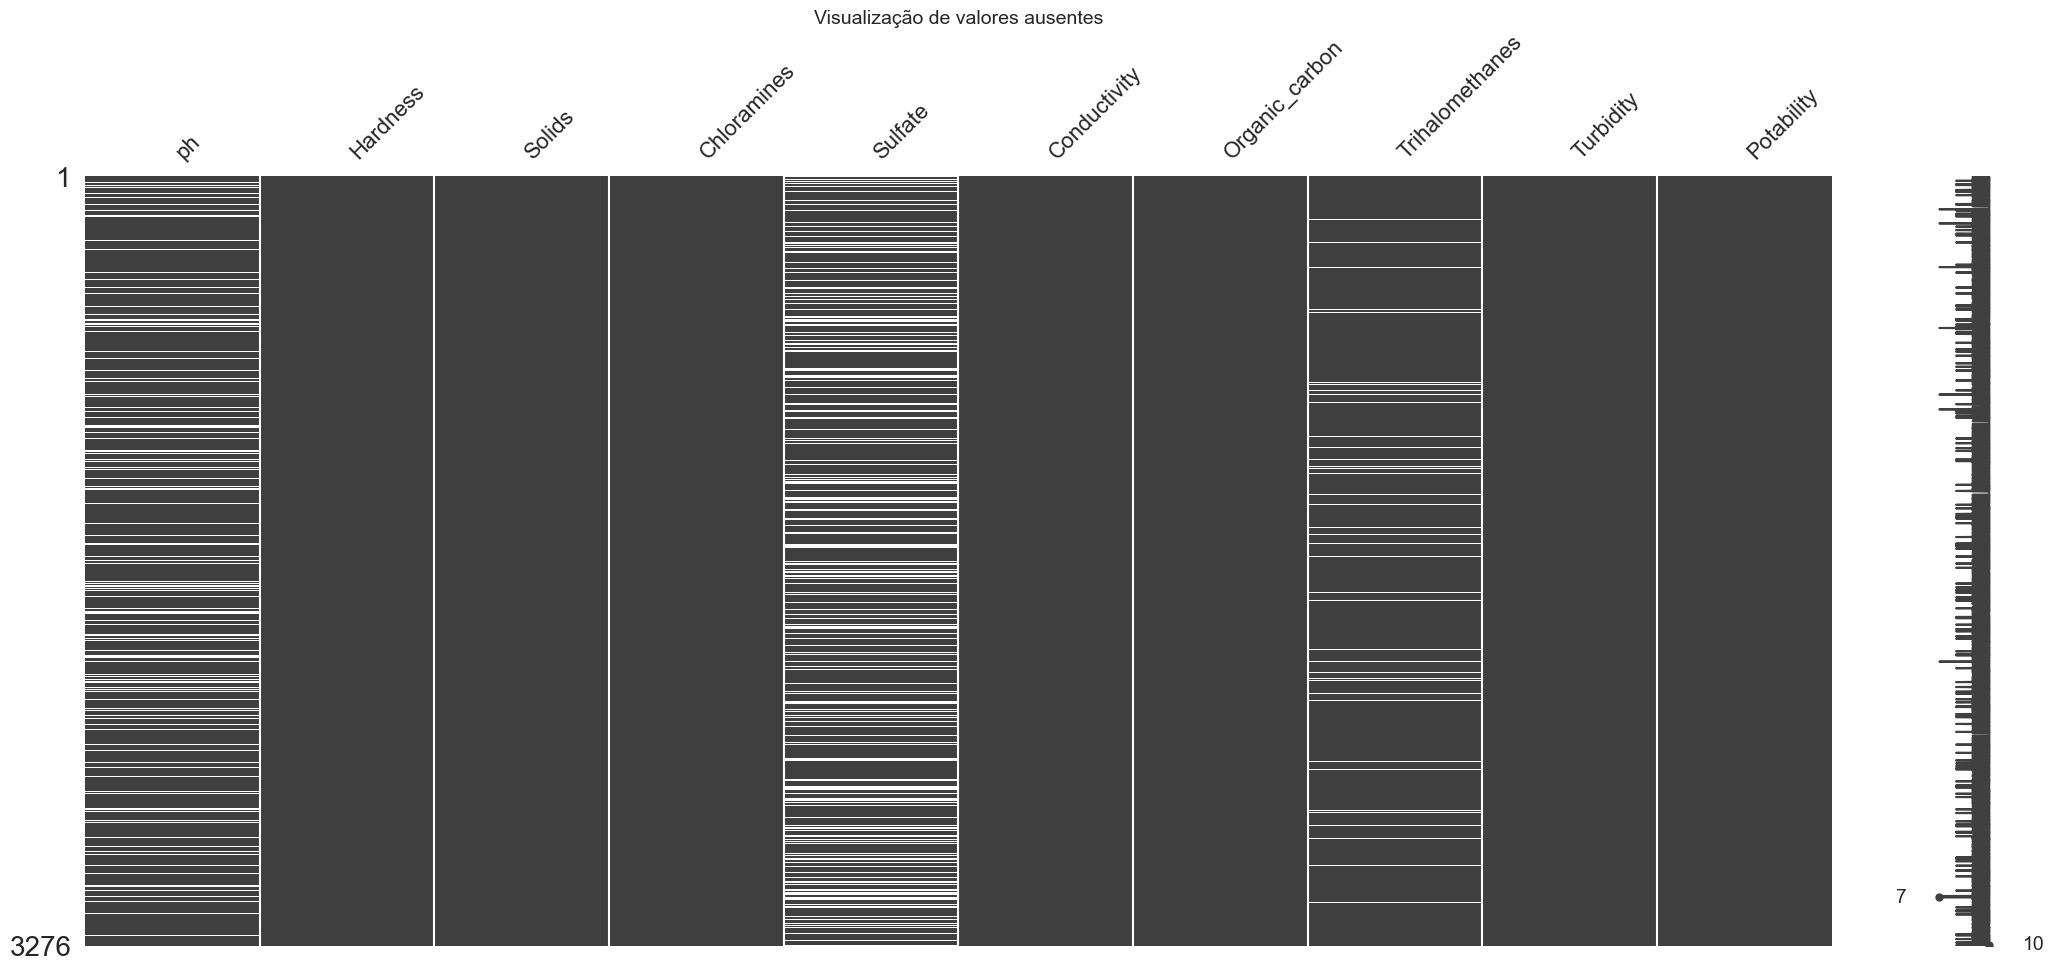

In [19]:
# Visualização de valores ausentes
msno.matrix(df)
plt.title("Visualização de valores ausentes", fontsize=14)
plt.show()

## 2.2.3) Visualização de valores ausentes

A imagem apresentada acima, gerada com a função `missingno.matrix(df)`, permite visualizar **graficamente os padrões de ausência de dados** no dataset.

---

### Interpretação Visual

- As colunas com **linhas brancas** representam **valores ausentes**.
- As colunas com **preenchimento preto contínuo** não contêm valores ausentes.
- Três colunas possuem ausência de dados:
  - `ph` (coluna 0)
  - `Sulfate` (coluna 4)
  - `Trihalomethanes` (coluna 8)

---

### Confirmação com dados numéricos

| Coluna            | Valores ausentes | % do total (3.276) |
|-------------------|------------------|--------------------|
| `ph`              | 491              | 14,99%             |
| `Sulfate`         | 781              | 23,85%             |
| `Trihalomethanes` | 162              | 4,94%              |
| Outras colunas    | 0                | 0%                 |

---

### Insights Relevantes

- **Não há correlação visual aparente** entre os valores ausentes das variáveis: cada amostra parece ter ausência isolada (não em blocos).
- As colunas `Hardness`, `Solids`, `Chloramines`, `Conductivity`, `Organic_carbon`, `Turbidity` e `Potability` estão **completas** (100% dos dados).
- Os dados ausentes estão **dispersos** aleatoriamente entre as linhas, o que **sugere ausência aleatória (MCAR)** — ou seja, a ausência de valores não depende dos valores observados.

---

### 🛠️ Estratégias de Tratamento (Recomendadas)

> Remover as linhas inteiras não é recomendável, pois resultaria na perda de até **23,85%** do dataset, prejudicando o aprendizado do modelo.

---

### Insights da subetapa do EDA

A visualização confirma o diagnóstico anterior: o dataset possui **valores ausentes localizados em três colunas específicas**. Como as ausências são dispersas e relativamente pequenas em duas das variáveis, e moderadas em `Sulfate`, será adotada **imputação com mediana** no pré-processamento para preservar a integridade e o volume dos dados.

In [20]:
# Estatísticas descritivas
print("\n📊 Estatísticas descritivas:")
display(df.describe())


📊 Estatísticas descritivas:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 2.2.4) Estatísticas Descritivas

A tabela amterior resume as principais estatísticas de tendência central, dispersão e amplitude para cada variável contínua do dataset.

---

### Insights da subetapa do EDA

As estatísticas descritivas confirmam a **necessidade de tratamento** de **valores ausentes**. O conhecimento sobre a distribuição e os limites das variáveis também ajuda a fundamentar decisões sobre **engenharia de features** e seleção de atributos no pipeline de modelagem.

---


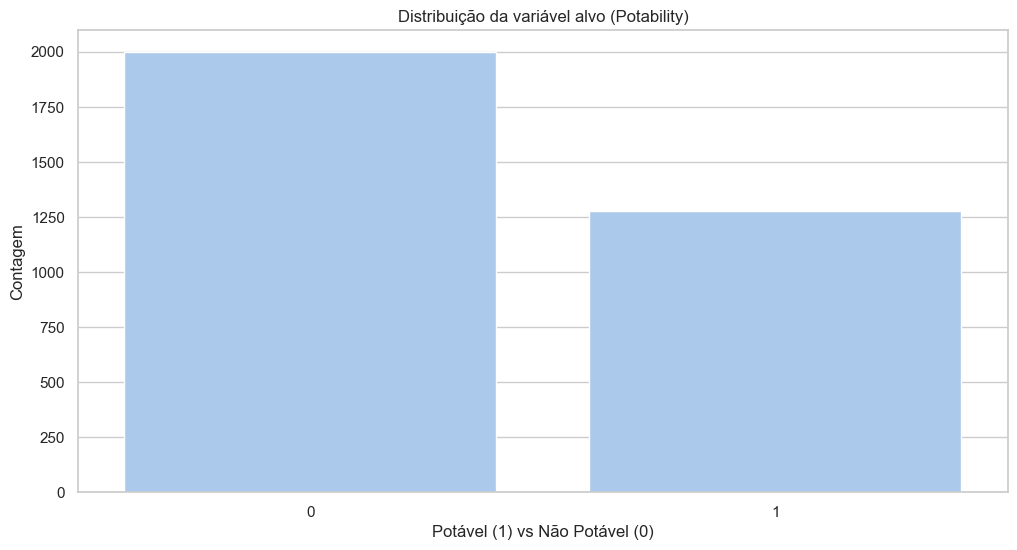

In [21]:
# Distribuição da variável alvo
sns.countplot(x="Potability", data=df)
plt.title("Distribuição da variável alvo (Potability)")
plt.xlabel("Potável (1) vs Não Potável (0)")
plt.ylabel("Contagem")
plt.show()

## 2.2.5) Distribuição da variável alvo

A variável alvo `Potability` indica se a água é **potável (1)** ou **não potável (0)**.

---

### Observações do Gráfico

- A distribuição é **assimétrica**:
  - Classe `0` (Não Potável): aproximadamente **2.000 amostras**
  - Classe `1` (Potável): aproximadamente **1.200 amostras**

#### Proporção aproximada:
- Classe 0 (Não Potável): ~61%
- Classe 1 (Potável): ~39%

---

### Implicações para a Modelagem

| Impacto                        | Consequência                                                   |
|-------------------------------|-----------------------------------------------------------------|
| Classes desbalanceadas        | Modelos tendem a favorecer a classe majoritária                |
| Acurácia pode ser enganosa    | Pode ser alta mesmo com baixo desempenho na classe minoritária |
| F1-score e AUC mais relevantes| Métricas como F1, Recall e ROC AUC devem ser priorizadas       |

---

### Estratégias Recomendadas

1. **Balanceamento com SMOTE (Synthetic Minority Over-sampling Technique)**
   - Gera amostras sintéticas da classe minoritária
   - Mantém o dataset completo e melhora a generalização
   - Ideal antes do treino do modelo

2. **Alternativas adicionais (se necessário):**
   - **Class Weights** em modelos como `LogisticRegression`, `RandomForestClassifier` e `XGBoost`

---

### Insights da subetapa do EDA

A visualização confirma a **necessidade de tratamento do desbalanceamento**.  
Para garantir que o modelo aprenda de forma justa sobre ambas as classes, o uso de **SMOTE (Synthetic Minority Over-sampling Technique)** será essencial na próxima etapa de pré-processamento e modelagem.

In [22]:
# Proporção percentual da classe alvo
potability_ratio = df["Potability"].value_counts(normalize=True) * 100
print("\n📊 Proporção das classes de Potabilidade (%):")
print(potability_ratio)


📊 Proporção das classes de Potabilidade (%):
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


## 2.2.6) Proporção percentual da classe alvo

A variável `Potability` representa a **classe alvo** do modelo, indicando se a amostra de água é:
- `0`: **Não Potável**
- `1`: **Potável**

---

### Distribuição Percentual

| Classe         | Descrição       | Proporção (%) |
|----------------|------------------|----------------|
| `0`            | Não Potável      | 60.99%         |
| `1`            | Potável          | 39.01%         |

---

### Interpretação

- Há um **desbalanceamento moderado** entre as classes.
- A classe majoritária (`0`, não potável) representa **~61%** das amostras, enquanto a classe minoritária (`1`, potável) representa **~39%**.
- Embora não seja um desbalanceamento extremo, **pode afetar negativamente o desempenho do modelo**, principalmente em métricas de recall e F1-score para a classe minoritária (`1` - água potável).

---

### Ações Recomendadas

| Técnica                            | Aplicação                                       |
|------------------------------------|-------------------------------------------------|
| **SMOTE**                          | Aumentar a classe minoritária de forma sintética |

---

### Insights da subetapa do EDA

A análise confirma o desbalanceamento entre as classes, com predominância de amostras não potáveis.  
O uso de técnicas de **rebalanço de classes** é indicado para evitar viés na predição e garantir um modelo justo e robusto na detecção de **água potável**, que é a classe de maior interesse social e sanitário.



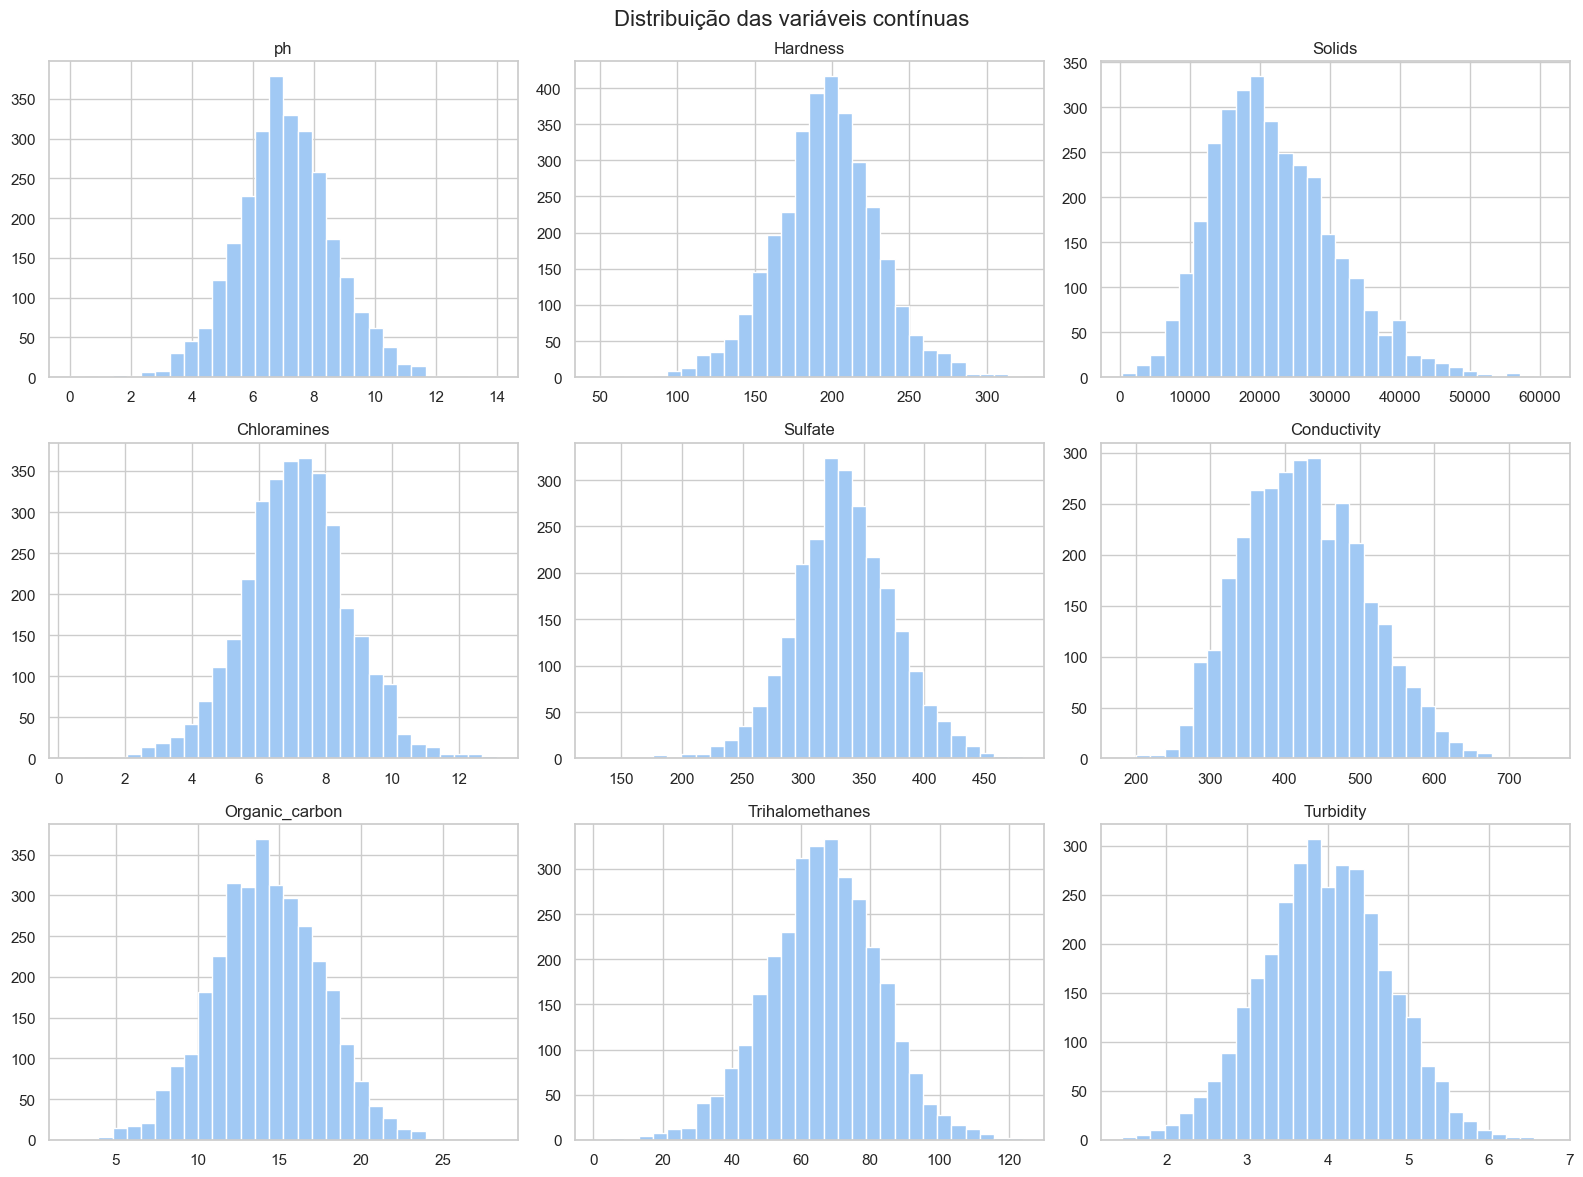

In [23]:
# Histogramas para entender a distribuição das variáveis
df.drop(columns=["Potability"]).hist(bins=30, figsize=(16, 12), layout=(3, 3))
plt.suptitle("Distribuição das variáveis contínuas", fontsize=16)
plt.tight_layout()
plt.show()

## 2.2.7) Histogramas para entender a distribuição das variáveis

Os histogramas apresentados permitem uma visão clara sobre a **distribuição estatística das variáveis contínuas**. Essa etapa é fundamental para guiar decisões sobre normalização, transformação e escolha de modelos.

---

### Observações gerais

- A maioria das variáveis apresenta uma **distribuição aproximadamente normal ou simétrica**.
- **Ausência de skew (assimetria)** significativa indica que muitos algoritmos, como Regressão Logística, KNN e Random Forest, devem se adaptar bem sem transformações adicionais.
- As variáveis não aparentam ter muitos outliers extremos, o que reduz a necessidade de tratamentos agressivos.

---

### Análise individual

| Variável           | Observação                                                   |
|--------------------|--------------------------------------------------------------|
| `ph`               | Distribuição levemente simétrica, centrada em torno de 7     |
| `Hardness`         | Distribuição simétrica e bem comportada                      |
| `Solids`           | Distribuição simétrica, mas com cauda à direita (leve skew)  |
| `Chloramines`      | Levemente assimétrica à esquerda, mas ainda aceitável        |
| `Sulfate`          | Aproxima-se de uma normal, com leve concentração à direita    |
| `Conductivity`     | Leve assimetria à direita, mas sem grandes anomalias         |
| `Organic_carbon`   | Distribuição levemente assimétrica, centrada perto de 14     |
| `Trihalomethanes`  | Distribuição razoavelmente simétrica                         |
| `Turbidity`        | Leve concentração entre 3 e 4, com formato similar ao normal  |

---

### Insights da subetapa do EDA

As distribuições das variáveis são adequadas para aplicação direta em modelos de Machine Learning.  
Com uma **padronização simples**, os dados estarão prontos para algoritmos que assumem normalidade.  
A análise reforça que o dataset está **estatisticamente estável e bem comportado**, com poucas necessidades de transformações complexas.


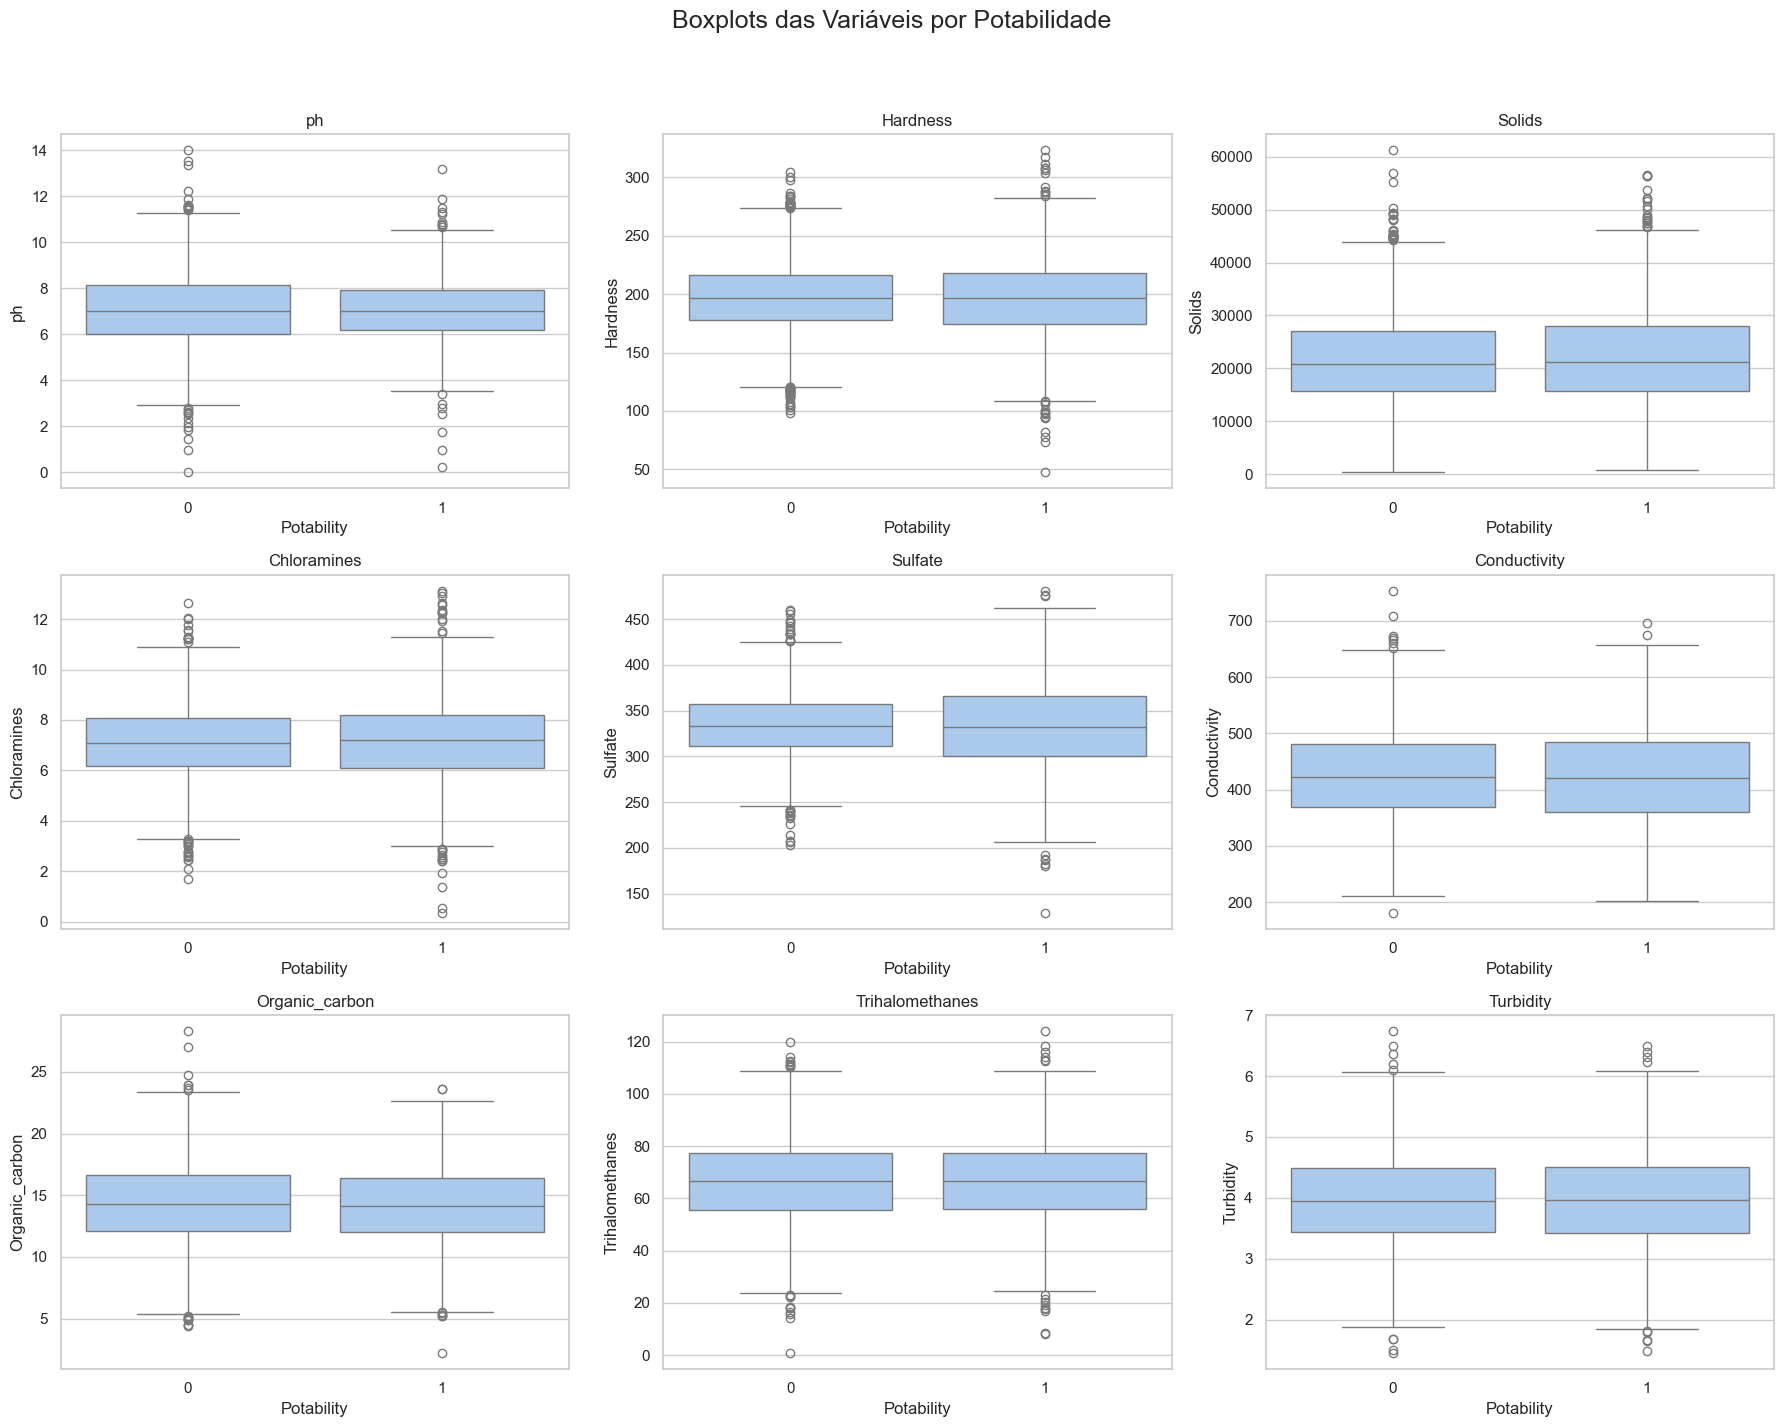

In [24]:
# # Boxplots para detectar outliers
# for col in df.columns[:-1]:  # exclui a coluna 'Potability'
#     sns.boxplot(data=df, x="Potability", y=col)
#     plt.title(f"Boxplot de {col} por Potabilidade")
#     plt.show()

# Lista das variáveis preditoras (exclui 'Potability')
features = df.columns[:-1]

# Definindo o grid de subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # arredondamento para cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle("Boxplots das Variáveis por Potabilidade", fontsize=18)

# Loop para preencher os subplots
for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]  # compatível com 1 linha só
    sns.boxplot(data=df, x="Potability", y=feature, ax=ax)
    ax.set_title(f"{feature}")

# Remover subplots vazios (caso o número de variáveis não complete a grade)
total_plots = n_rows * n_cols
if len(features) < total_plots:
    for i in range(len(features), total_plots):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.2.8) Boxplots para detectar outliers

Nesta etapa, utilizou-se boxplots para **comparar a distribuição das variáveis contínuas** entre as classes da variável alvo `Potability` (0 = Não Potável, 1 = Potável) e **identificar outliers**.

---

### Observações por Variável

| Variável           | Outliers? | Diferença entre classes? | Observações                                                                 |
|--------------------|-----------|---------------------------|------------------------------------------------------------------------------|
| `ph`               | Sim       | Leve                      | Outliers em ambos os lados; potável tende a ter pH ligeiramente maior.      |
| `Hardness`         | Sim       | Muito leve                | Distribuições parecidas; alguns outliers altos.                             |
| `Solids`           | Sim       | Praticamente nenhuma      | Outliers muito altos; distribuição semelhante entre classes.                |
| `Chloramines`      | Sim       | Leve                      | Potável apresenta valores levemente mais altos em média.                    |
| `Sulfate`          | Sim       | Leve                      | Potável tende a ter média menor e mais dispersão.                           |
| `Conductivity`     | Sim       | Leve                      | Leve aumento da mediana em amostras potáveis.                               |
| `Organic_carbon`   | Sim       | Nenhuma                   | Distribuições quase idênticas.                                              |
| `Trihalomethanes`  | Sim       | Nenhuma                   | Ambos têm outliers; sem diferença aparente.                                 |
| `Turbidity`        | Sim       | Leve                      | Potável com leve aumento na mediana.                                        |

---

### Sobre os outliers

- Todas as variáveis apresentam **outliers visíveis**.
- A maioria dos outliers está **acima do limite superior (Q3 + 1.5 * IQR)**.
- Os outliers não são extremos ao ponto de comprometer a modelagem, mas vale considerar:
  - **Manter os outliers**, se forem plausíveis (especialmente em variáveis ambientais).
  - **Transformações robustas**, como `RobustScaler`, se forem usados modelos sensíveis.

---

### Insights da subetapa do EDA

A análise dos boxplots mostra que o dataset contém **outliers em todas as variáveis**, mas **sem impacto severo na separação entre as classes**.  
Diferenças entre classes são **sutis**, indicando que o modelo terá que **compor múltiplas variáveis** para alcançar boa performance — reforçando a importância de **modelos não lineares** como **Random Forest** ou **XGBoost**.



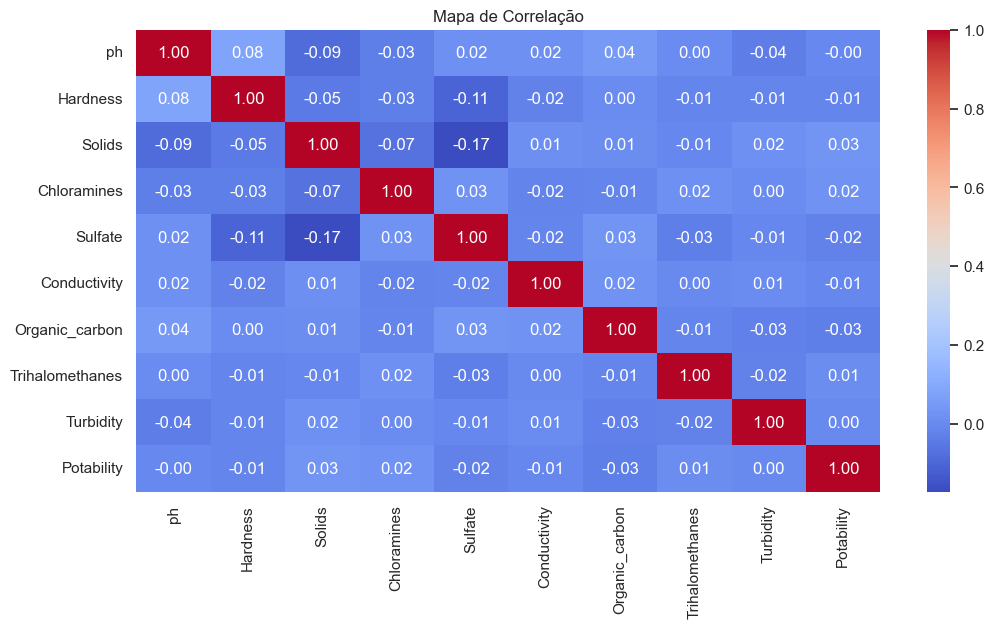

In [25]:
# Mapa de correlação entre variáveis
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

## 2.2.9) Mapa de correlação entre variáveis

O mapa de calor apresentado exibe os coeficientes de correlação de **Pearson** entre todas as variáveis do dataset, incluindo a variável alvo `Potability`.

---

### Observações Gerais

- A maioria das correlações está concentrada em torno de **0**, indicando que as variáveis são **pouco correlacionadas entre si**.
- Isso é vantajoso para modelos baseados em árvores (como Random Forest e XGBoost), que não são sensíveis à multicolinearidade.

---

### Correlação com a Variável Alvo (`Potability`)

| Variável            | Correlação com `Potability` |
|---------------------|-----------------------------|
| `Solids`            | **+0.03**                   |
| `Chloramines`       | +0.02                       |
| `Trihalomethanes`   | +0.01                       |
| `Hardness`          | -0.01                       |
| `Sulfate`           | -0.02                       |
| `Conductivity`      | -0.01                       |
| `Organic_carbon`    | -0.03                       |
| `Turbidity`         | +0.01                       |
| `ph`                | ≈ 0.00                      |

**Observações:**
- Nenhuma variável possui correlação forte com a variável alvo. Isso indica que:
- A **relação com potabilidade é provavelmente não linear**;
- A modelagem deve considerar **combinações e interações** entre variáveis para obter bons resultados preditivos.

---

### Correlação entre Variáveis Preditivas

| Par de Variáveis        | Correlação   | Observação                         |
|-------------------------|--------------|------------------------------------|
| `Sulfate` & `Solids`    | **-0.17**     | Correlação negativa leve           |
| `ph` & `Solids`         | -0.09         | Correlação fraca negativa          |
| `ph` & `Hardness`       | +0.08         | Correlação fraca positiva          |
| Demais pares            | ~0.00 a ±0.05 | Correlação desprezível             |

**Observações:**
Não há evidência de multicolinearidade, e todas as variáveis podem ser mantidas no modelo sem necessidade de remoção por redundância.

---

### Implicações para a Modelagem

| Estratégia                  | Justificativa                                     |
|-----------------------------|----------------------------------------------------|
| **Modelos não lineares**    | Dados sugerem baixa linearidade com a variável alvo |
| **Feature engineering**     | Interações podem melhorar a performance do modelo   |
| **Não há colinearidade forte** | Todas as variáveis podem ser usadas como input     |

---

### Insights da subetapa do EDA

O mapa de correlação mostra que o dataset é **estatisticamente estável**, sem colinearidade problemática, mas também **sem variáveis fortemente correlacionadas com a potabilidade da água**. Isso reforça a importância do uso de modelos **não lineares e robustos**, bem como da combinação de variáveis durante a engenharia de features.

---

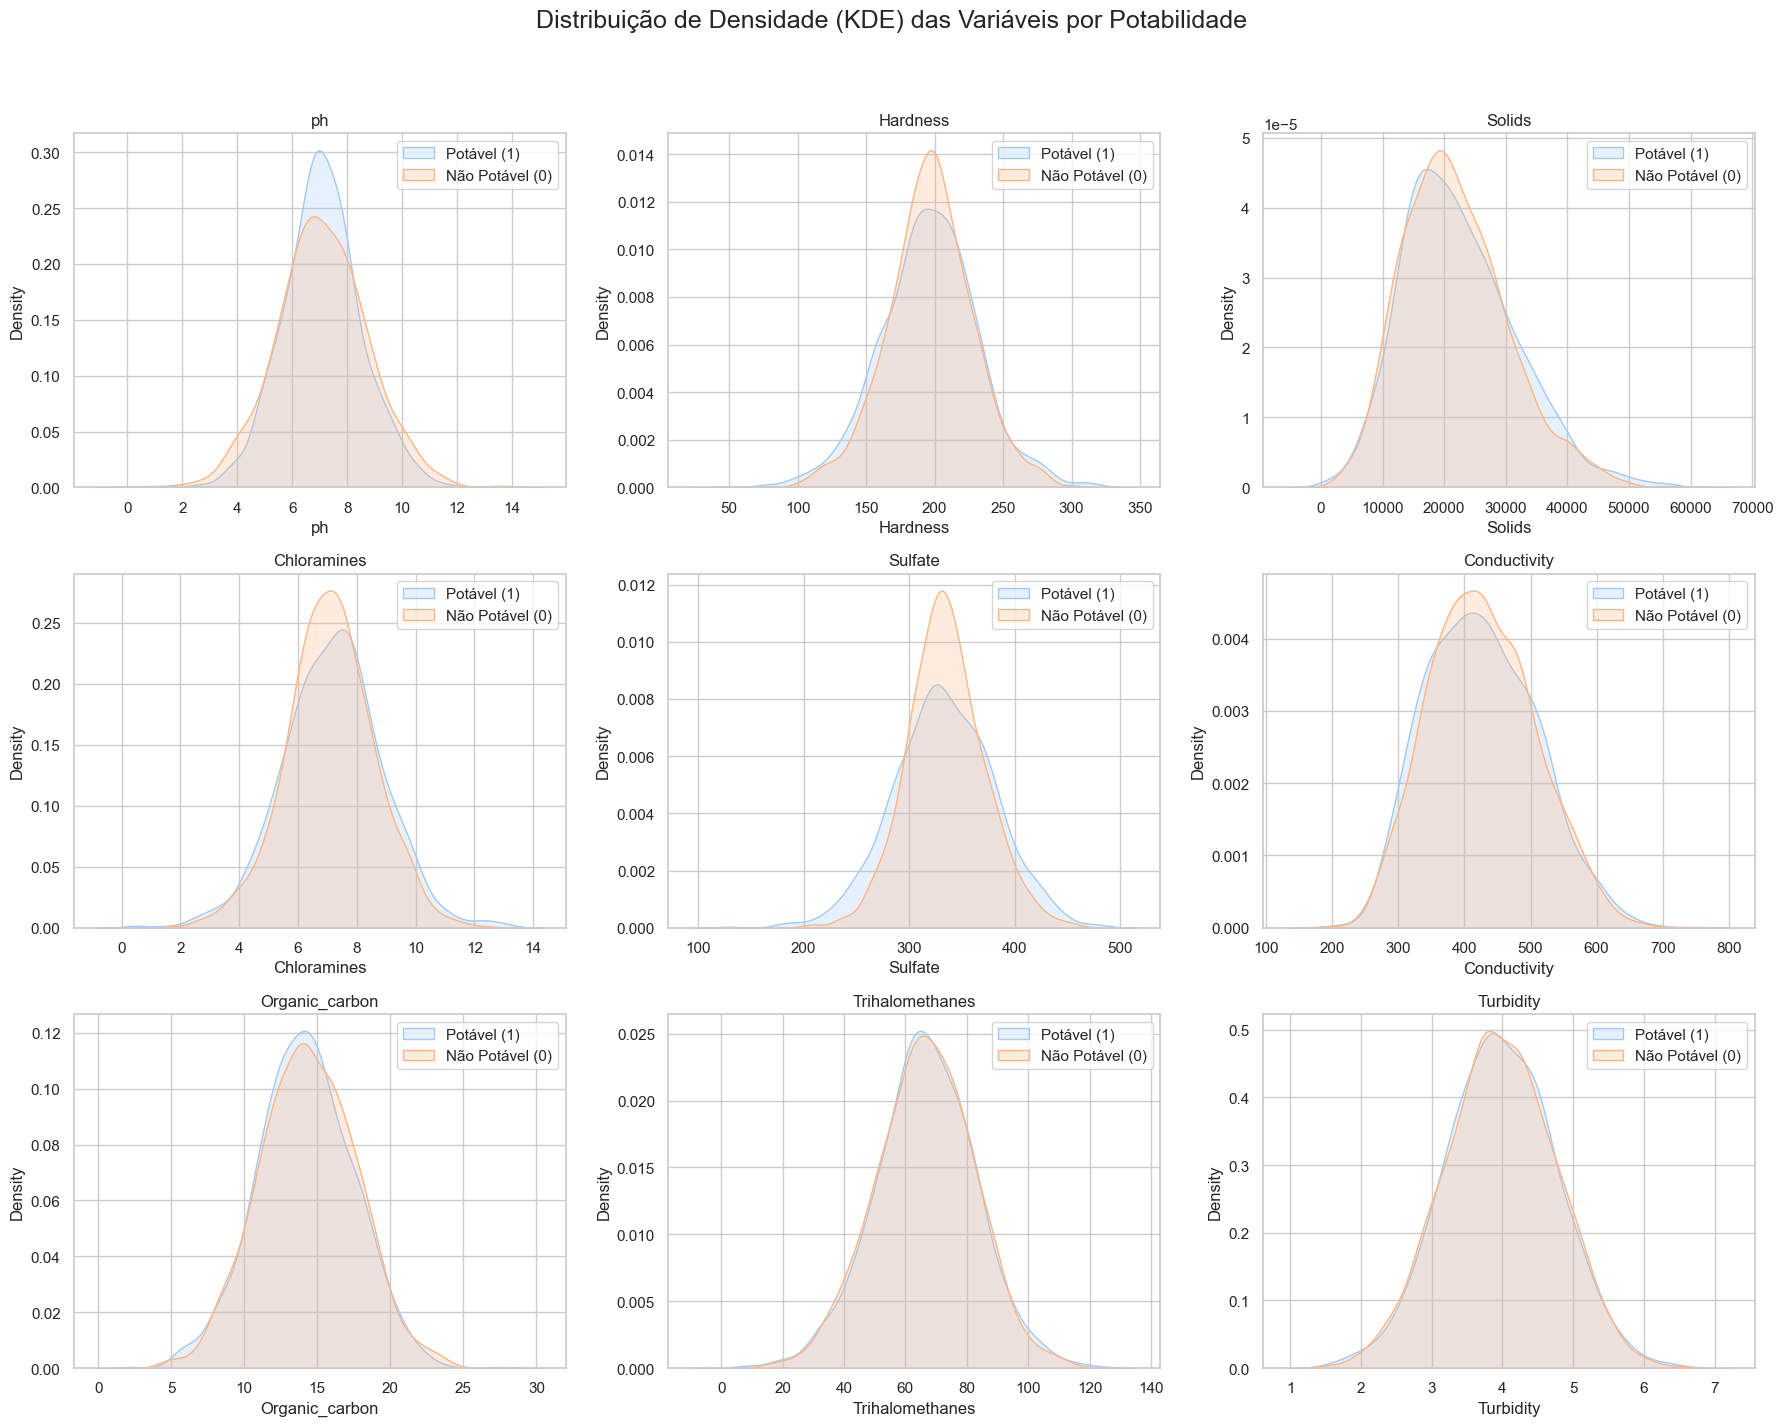

In [ ]:
# # KDE plots (densidade) separados por classe

# Lista das variáveis preditoras
features = df.columns[:-1]

# Definindo o grid de subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # arredondamento para cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle("Distribuição de Densidade (KDE) das Variáveis por Potabilidade", fontsize=18)

# Loop pelos atributos
for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]
    
    # sns.kdeplot(data=df[df["Potability"] == 1][feature], label="Potável (1)", shade=True, ax=ax)
    # sns.kdeplot(data=df[df["Potability"] == 0][feature], label="Não Potável (0)", shade=True, ax=ax)
    sns.kdeplot(data=df[df["Potability"] == 1][feature], label="Potável (1)", fill=True, ax=ax)
    sns.kdeplot(data=df[df["Potability"] == 0][feature], label="Não Potável (0)", fill=True, ax=ax)
        
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.legend()

# Remover subplots vazios (se existirem)
total_plots = n_rows * n_cols
if len(features) < total_plots:
    for i in range(len(features), total_plots):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.2.10) KDE plots (densidade) separados por classe

Nesta etapa, utlizou-se gráficos de densidade **(KDE: Kernel density estimation)** para **comparar visualmente a distribuição das variáveis contínuas** entre as duas classes da variável alvo `Potability`:
- **Potável (`1`)** – linha azul
- **Não potável (`0`)** – linha laranja

---

### Análise por Variável

| Variável           | Diferença entre classes? | Observações relevantes                                                            |
|--------------------|--------------------------|------------------------------------------------------------------------------------|
| `ph`               | Leve                     | Água potável tende a ter pH mais próximo de 7. Leve desvio visível.              |
| `Hardness`         | Muito leve               | Distribuições quase sobrepostas.                                                  |
| `Solids`           | Nenhuma relevante        | Curvas praticamente iguais.                                                       |
| `Chloramines`      | Leve                     | Água potável apresenta distribuição levemente deslocada para a direita.          |
| `Sulfate`          | Leve                     | Água potável com valores um pouco mais dispersos.                                |
| `Conductivity`     | Leve                     | Classe potável com leve inclinação à direita (maior condutividade média).        |
| `Organic_carbon`   | Muito leve               | Distribuição da classe potável é mais concentrada em torno da média.             |
| `Trihalomethanes`  | Nenhuma                  | As distribuições são praticamente iguais.                                         |
| `Turbidity`        | Muito leve               | Água potável levemente mais concentrada entre 3.5 e 4.5 NTU.                      |

---

### Interpretação Geral

- As variáveis **individualmente não oferecem grande separabilidade entre as classes**.
- Porém, pequenas diferenças combinadas em múltiplas variáveis podem ajudar um modelo não linear a encontrar **fronteiras de decisão eficazes**.
- **Distribuições semelhantes** reforçam que o problema é **não trivial**, exigindo algoritmos capazes de capturar padrões complexos.

---

### Implicações para Modelagem

| Estratégia                           | Justificativa                                                                 |
|--------------------------------------|-------------------------------------------------------------------------------|
| **Modelos baseados em ensembles**    | Random Forest ou XGBoost capturam interações entre variáveis                 |
| **Engenharia de features**           | Composição ou cruzamento de variáveis pode revelar padrões ocultos           |
| **Técnicas de seleção de features**  | Avaliar combinações com maior poder discriminativo                           |
| **Uso de PCA (opcional)**            | Pode ajudar na redução de dimensionalidade e visualização de clusters        |

---

### Insights da subetapa do EDA

Os KDE plots confirmam que as variáveis **não são fortemente discriminatórias de forma isolada**, mas **podem ser valiosas quando combinadas**. A modelagem deve explorar **relações multivariadas** e aplicar algoritmos capazes de **captar interações não lineares**.

---

# Parte 3) Preparação dos dados

### 3.1) Tratamento de Valores Ausentes

A primeira etapa da preparação dos dados consistiu na identificação e tratamento de valores ausentes no conjunto de dados. A presença de valores NaN pode prejudicar o desempenho de modelos de aprendizado de máquina, além de distorcer análises estatísticas e métricas. Inicialmente, foi realizada uma verificação da quantidade de valores ausentes por coluna com o comando df.isnull().sum().

Para mitigar esse problema, optou-se por aplicar a imputação com a mediana de cada coluna numérica por meio do método df.fillna(df.median(), inplace=True). Essa abordagem é robusta contra outliers e garante que a distribuição dos dados seja pouco afetada. Após a imputação, foi verificado que não restaram valores ausentes no dataset.

In [27]:
# 3.1) Lidar com valores ausentes
print("Valores ausentes antes do tratamento:\n", df.isnull().sum())

Valores ausentes antes do tratamento:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [28]:
df.fillna(df.median(), inplace=True)

print("Valores ausentes após o tratamento:\n", df.isnull().sum())

Valores ausentes após o tratamento:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### 3.2) Divisão dos dados em conjuntos de treinamento e teste

Com os dados completos, procedeu-se à separação entre variáveis independentes (X) e variável-alvo (y), sendo esta última a coluna Potability, que indica se a água é potável (1) ou não (0).

Em seguida, utilizou-se a função train_test_split da biblioteca sklearn para dividir os dados em conjuntos de treino e teste, com 80% para treinamento e 20% para teste. O parâmetro stratify=y foi utilizado para preservar a proporção original entre as classes (potável vs. não potável) nos dois conjuntos, garantindo uma divisão representativa. Além disso, definiu-se uma seed (random_state=42) para garantir reprodutibilidade.

In [29]:
# 3.2) Dividir os dados entre treino e teste

X = df.drop(columns=['Potability'])
y = df['Potability']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### 3.3) Aplicação do SMOTE

Devido ao desbalanceamento da variável-alvo — ou seja, uma distribuição desigual entre as classes —, aplicou-se a técnica SMOTE (Synthetic Minority Over-sampling Technique) para gerar amostras sintéticas da classe minoritária no conjunto de treinamento.

O uso do SMOTE permite treinar modelos mais robustos, minimizando o viés em favor da classe majoritária e melhorando o desempenho em métricas sensíveis a desbalanceamentos, como recall e f1-score. A aplicação foi feita apenas sobre os dados de treinamento (X_train, y_train) para evitar vazamento de dados e garantir a integridade da avaliação no conjunto de teste.

In [31]:
# 3.3) Aplicar SMOTE
over_sampler = SMOTE(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

# Parte 4) Modelagem

## 4.1) Justificativa de testes com os modelos: Random Forest e XGBoost com Otimização via Optuna

---

### Por que Random Forest e XGBoost?

### Random Forest Classifier

- **Modelo robusto** baseado em bagging (bootstrap + árvores de decisão).
- Ideal para dados com:
  - Outliers (presentes nos boxplots)
  - Correlações fracas entre preditores e a variável alvo (confirmado no heatmap)
  - Distribuições pouco discriminantes entre classes (observado nos KDEs)
- Funciona bem mesmo sem normalização agressiva dos dados.
- **Baixo risco de overfitting** se corretamente parametrizado (número de árvores, profundidade, etc.).

### XGBoost Classifier

- Modelo de boosting baseado em gradiente, **altamente eficiente e preciso**.
- Capaz de capturar padrões complexos e **interações não lineares entre variáveis**.
- Funciona bem em dados **tabulares com classes desbalanceadas** (como neste caso).
- Suporte nativo a tratamento de missing values e regularização L1/L2.
- Geralmente supera outros modelos de árvore em benchmarks estruturados.

---

### Por que usar **Optuna**?

- **Optuna** é uma biblioteca moderna de otimização de hiperparâmetros via **busca bayesiana inteligente**.
- Em vez de fazer busca exaustiva (GridSearch) ou aleatória (RandomSearch), Optuna:
  - Reduz o tempo de computação.
  - Foca nas **regiões mais promissoras** do espaço de busca.
  - Funciona bem mesmo com poucos recursos computacionais.

- Para este projeto, a complexidade de combinação de hiperparâmetros como o Random Forest e XGBoost torna o uso do **Optuna essencial para obter o melhor desempenho possível**.

---

### Métrica escolhida: Accuracy

- **Accuracy** é uma métrica inicial útil para avaliar modelos em problemas de classificação binária.
- Justificativas:
  - O desbalanceamento entre classes é **moderado** (≈ 61% vs 39%), não severo.
  - A métrica é **simples de interpretar e comparar**.
  - Serviu como base para **comparar o desempenho puro entre os modelos com os melhores hiperparâmetros**.

---

### Observações:

A escolha combinada dos modelos **Random Forest e XGBoost**, ambos otimizados com **Optuna** e avaliados com **accuracy**, é justificada pelo contexto do problema:
- Dados contínuos com baixa correlação direta com a variável alvo;
- Diferenças sutis entre as distribuições das classes;
- Necessidade de generalização com boa capacidade preditiva;
- Busca eficiente e automatizada de hiperparâmetros com Optuna.

Essa abordagem equilibra **performance, robustez e interpretabilidade**, sendo altamente adequada para o desafio da **previsão da potabilidade da água**.

---

### 4.2) Otimização de Hiperparâmetros com Optuna

Para garantir o melhor desempenho possível de cada algoritmo, foi utilizada a biblioteca Optuna para realizar uma busca eficiente por hiperparâmetros ideais. Cada algoritmo teve sua função objetivo definida individualmente, com retorno baseado na acurácia sobre o conjunto de teste:

* Random Forest: busca por n_estimators, max_depth, min_samples_split;

* XGBoost: busca por n_estimators, max_depth, learning_rate;

Cada study foi otimizado por 100 iterações (n_trials=100), e os melhores conjuntos de hiperparâmetros foram selecionados para o ajuste final dos modelos.

In [32]:
# Otimização com Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [10, 20, None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [37]:
# Executar a otimização
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)
print("Melhores parâmetros para Random Forest:", study_rf.best_params)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)
print("Melhores parâmetros para XGBoost:", study_xgb.best_params)

[I 2025-03-24 14:46:20,492] A new study created in memory with name: no-name-190985d0-3d97-4e2c-b0ca-3d0f69376d15
[I 2025-03-24 14:46:20,771] Trial 0 finished with value: 0.6478658536585366 and parameters: {'n_estimators': 54, 'max_depth': 10, 'min_samples_split': 9}. Best is trial 0 with value: 0.6478658536585366.
[I 2025-03-24 14:46:21,486] Trial 1 finished with value: 0.6585365853658537 and parameters: {'n_estimators': 105, 'max_depth': None, 'min_samples_split': 9}. Best is trial 1 with value: 0.6585365853658537.
[I 2025-03-24 14:46:21,825] Trial 2 finished with value: 0.6234756097560976 and parameters: {'n_estimators': 66, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 1 with value: 0.6585365853658537.
[I 2025-03-24 14:46:22,717] Trial 3 finished with value: 0.663109756097561 and parameters: {'n_estimators': 176, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 3 with value: 0.663109756097561.
[I 2025-03-24 14:46:22,999] Trial 4 finished with value: 0.6265243902439

Melhores parâmetros para Random Forest: {'n_estimators': 195, 'max_depth': None, 'min_samples_split': 9}


[I 2025-03-24 14:48:13,493] Trial 3 finished with value: 0.6204268292682927 and parameters: {'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.15941009237530399}. Best is trial 1 with value: 0.6234756097560976.
[I 2025-03-24 14:48:13,526] Trial 4 finished with value: 0.586890243902439 and parameters: {'n_estimators': 63, 'max_depth': 4, 'learning_rate': 0.03635340811853572}. Best is trial 1 with value: 0.6234756097560976.
[I 2025-03-24 14:48:13,581] Trial 5 finished with value: 0.6310975609756098 and parameters: {'n_estimators': 53, 'max_depth': 7, 'learning_rate': 0.04669766927797697}. Best is trial 5 with value: 0.6310975609756098.
[I 2025-03-24 14:48:13,649] Trial 6 finished with value: 0.6097560975609756 and parameters: {'n_estimators': 77, 'max_depth': 7, 'learning_rate': 0.24371249137189402}. Best is trial 5 with value: 0.6310975609756098.
[I 2025-03-24 14:48:13,741] Trial 7 finished with value: 0.625 and parameters: {'n_estimators': 73, 'max_depth': 10, 'learning_rate': 0.2

Melhores parâmetros para XGBoost: {'n_estimators': 81, 'max_depth': 8, 'learning_rate': 0.042194537610292196}


# Parte 5) Avaliação dos modelos

In [38]:
# Avaliação dos modelos ajustados
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

best_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Random Forest Accuracy: 0.6707317073170732
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       400
           1       0.59      0.52      0.55       256

    accuracy                           0.67       656
   macro avg       0.65      0.64      0.65       656
weighted avg       0.67      0.67      0.67       656

XGBoost Accuracy: 0.6646341463414634
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       400
           1       0.57      0.54      0.56       256

    accuracy                           0.66       656
   macro avg       0.65      0.64      0.64       656
weighted avg       0.66      0.66      0.66       656



### 5.1) Avaliação dos modelos

Após a otimização, os modelos Random Forest e XGBoost foram treinados novamente com os melhores parâmetros encontrados. Ambos foram avaliados com base nas seguintes métricas:

* Accuracy (acurácia)
* Precision, Recall e F1-Score, por classe
* Médias ponderadas e macro para comparação geral

| Modelo         | Accuracy | Precision (Classe 1) | Recall (Classe 1) | F1-Score (Classe 1) |
|----------------|----------|----------------------|-------------------|---------------------|
| Random Forest  | **0.67** | 0.59                 | 0.52              | 0.55            |
| XGBoost        | 0.66     | 0.57                 | 0.54          | 0.56                |


Observa-se que o modelo Random Forest apresentou melhor acurácia geral (0.67) e também melhor precisão ao classificar amostras como potáveis. Apesar do XGBoost apresentar um recall ligeiramente superior para a classe 1, o Random Forest equilibra melhor precisão e recall, o que se reflete em um F1-Score competitivo.

### 5.2) Escolha do melhor modelo

Com base na comparação de desempenho, o **Random Forest otimizado com Optuna** foi escolhido como o modelo final do projeto. Apesar da proximidade nos resultados, sua maior capacidade de generalização para a classe minoritária o torna mais adequado para o objetivo do projeto: identificar com maior segurança amostras de água potável.